In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv("D:\PythonProjects\HousePricePrediction\dataset\housing.csv", sep=",") # Loading data to read

In [29]:
data.head(10) # First approac to data to predictions. (Ocean_proximity is categorical(Ordinal) use them as factors is a good approach.)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [30]:
data.info() # Checikng for NA.  total_bedrooms have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
data.dropna(inplace=True) # Dropping na values and save the dataset.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [33]:
# Splitting data as train and test

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis= 1 )
y = data['median_house_value']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
train_data = X_train.join(y_train)

In [37]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19487,-120.99,37.67,28.0,1768.0,423.0,1066.0,392.0,1.8315,INLAND,90500.0
8965,-118.39,34.00,35.0,1465.0,386.0,1104.0,345.0,4.0560,<1H OCEAN,339100.0
3208,-119.63,36.33,14.0,2928.0,600.0,1633.0,559.0,1.8385,INLAND,67500.0
16613,-121.14,35.55,13.0,5383.0,1070.0,1880.0,796.0,3.8019,NEAR OCEAN,271200.0
5005,-118.32,34.01,50.0,1842.0,377.0,817.0,341.0,3.1548,<1H OCEAN,157700.0
...,...,...,...,...,...,...,...,...,...,...
18802,-122.08,40.64,14.0,3099.0,519.0,1447.0,494.0,4.0132,INLAND,141200.0
1605,-122.08,37.88,24.0,2059.0,462.0,410.0,294.0,2.3971,NEAR BAY,99400.0
2838,-119.00,35.39,51.0,1373.0,284.0,648.0,300.0,2.8295,INLAND,72100.0
4456,-118.18,34.09,40.0,2744.0,708.0,2747.0,674.0,2.6226,<1H OCEAN,148800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

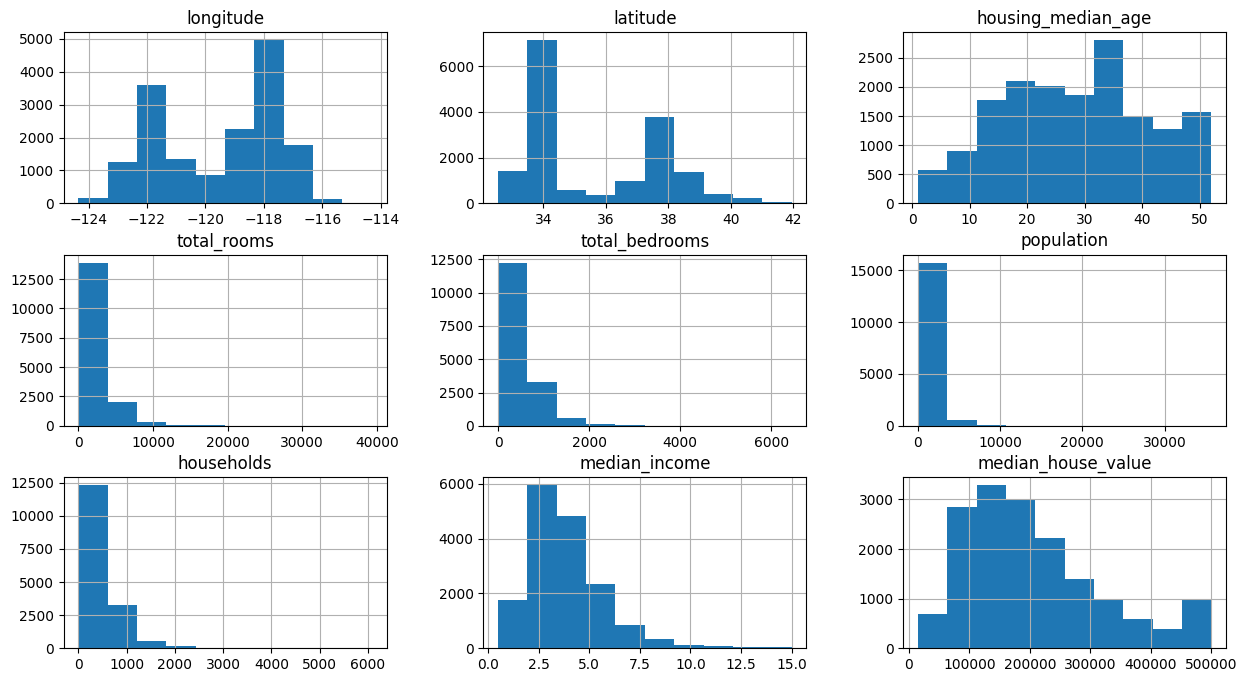

In [38]:
train_data.hist(figsize=(15, 8)) # Draw histogram of train data to get correlation

<Axes: >

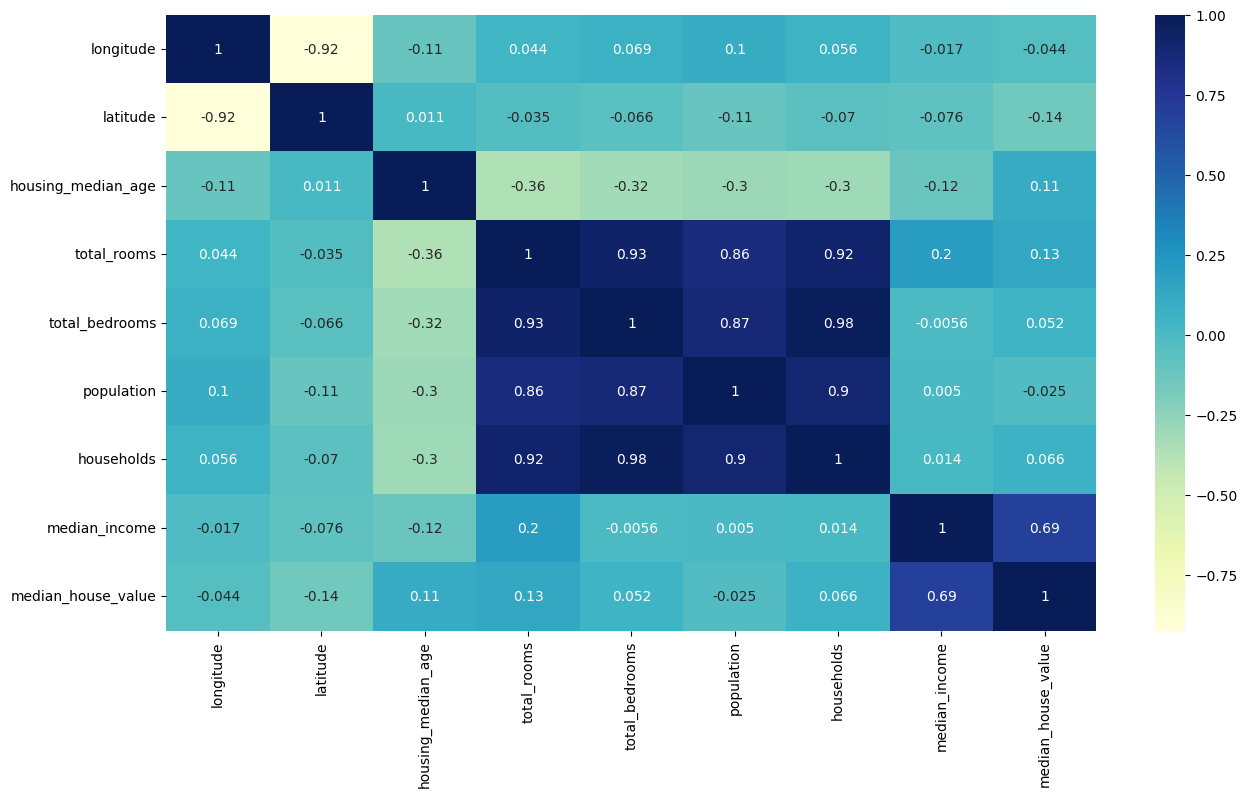

In [39]:
plt.figure(figsize=(15,8)) # Const fix for plots
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu") # Looking at correlations.

In [40]:
train_data["total_rooms"] = np.log(train_data['total_rooms'] + 1)
train_data["total_bedrooms"] = np.log(train_data['total_bedrooms'] + 1)
train_data["population"] = np.log(train_data['population'] + 1)
train_data["households"] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

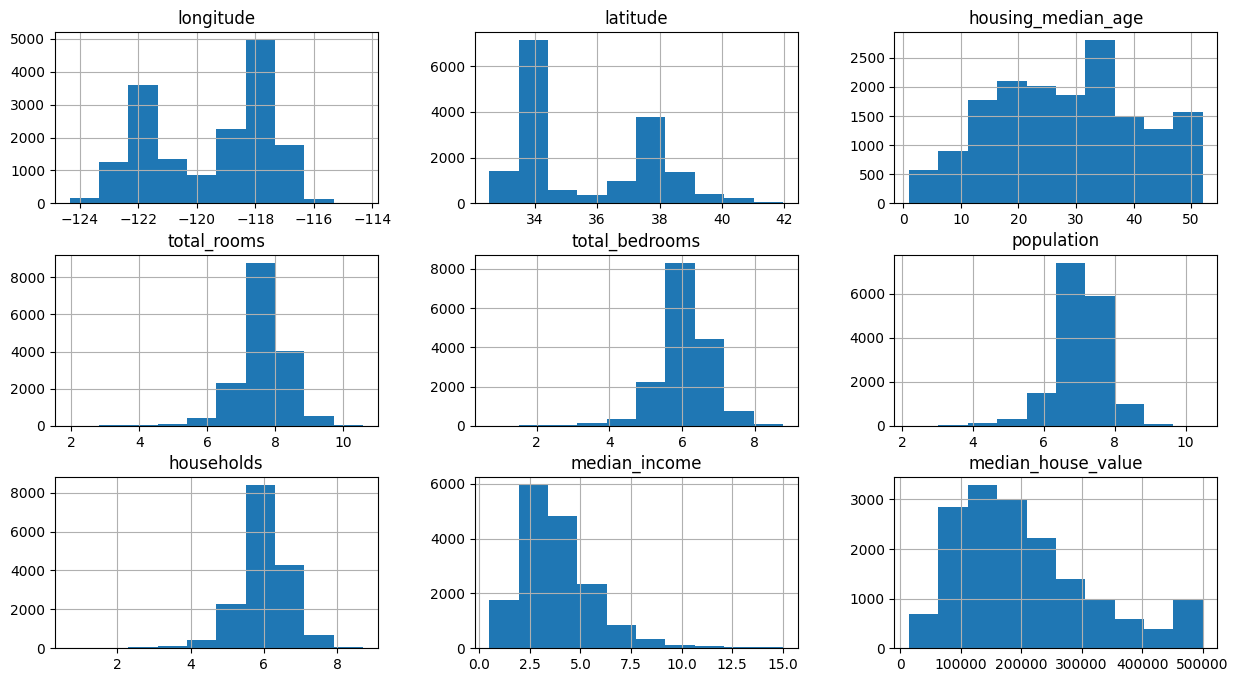

In [41]:
train_data.hist(figsize=(15,8))

In [42]:
# Dealing with categorical values.

train_data.ocean_proximity.value_counts()

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

train_data = train_data.drop(['ISLAND'], axis=1)

In [43]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
19487,-120.99,37.67,28.0,7.478170,6.049733,6.972606,5.973810,1.8315,90500.0,False,True,False,False
8965,-118.39,34.00,35.0,7.290293,5.958425,7.007601,5.846439,4.0560,339100.0,True,False,False,False
3208,-119.63,36.33,14.0,7.982416,6.398595,7.398786,6.327937,1.8385,67500.0,False,True,False,False
16613,-121.14,35.55,13.0,8.591187,6.976348,7.539559,6.680855,3.8019,271200.0,False,False,False,True
5005,-118.32,34.01,50.0,7.519150,5.934894,6.706862,5.834811,3.1548,157700.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18802,-122.08,40.64,14.0,8.039157,6.253829,7.277939,6.204558,4.0132,141200.0,False,True,False,False
1605,-122.08,37.88,24.0,7.630461,6.137727,6.018593,5.686975,2.3971,99400.0,False,False,True,False
2838,-119.00,35.39,51.0,7.225481,5.652489,6.475433,5.707110,2.8295,72100.0,False,True,False,False
4456,-118.18,34.09,40.0,7.917536,6.563856,7.918629,6.514713,2.6226,148800.0,True,False,False,False


<Axes: >

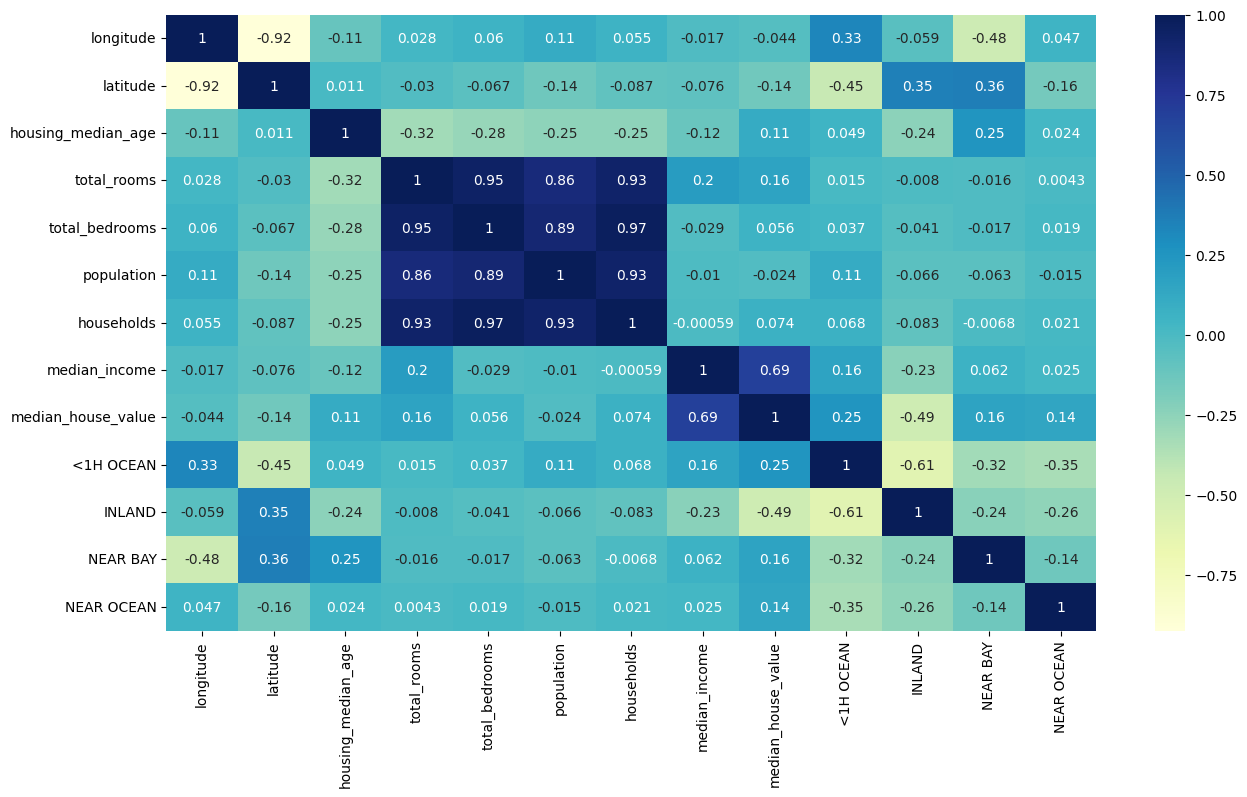

In [44]:
plt.figure(figsize=(15,8)) # Const fix for plots
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu") # Looking at correlations.

<Axes: xlabel='latitude', ylabel='longitude'>

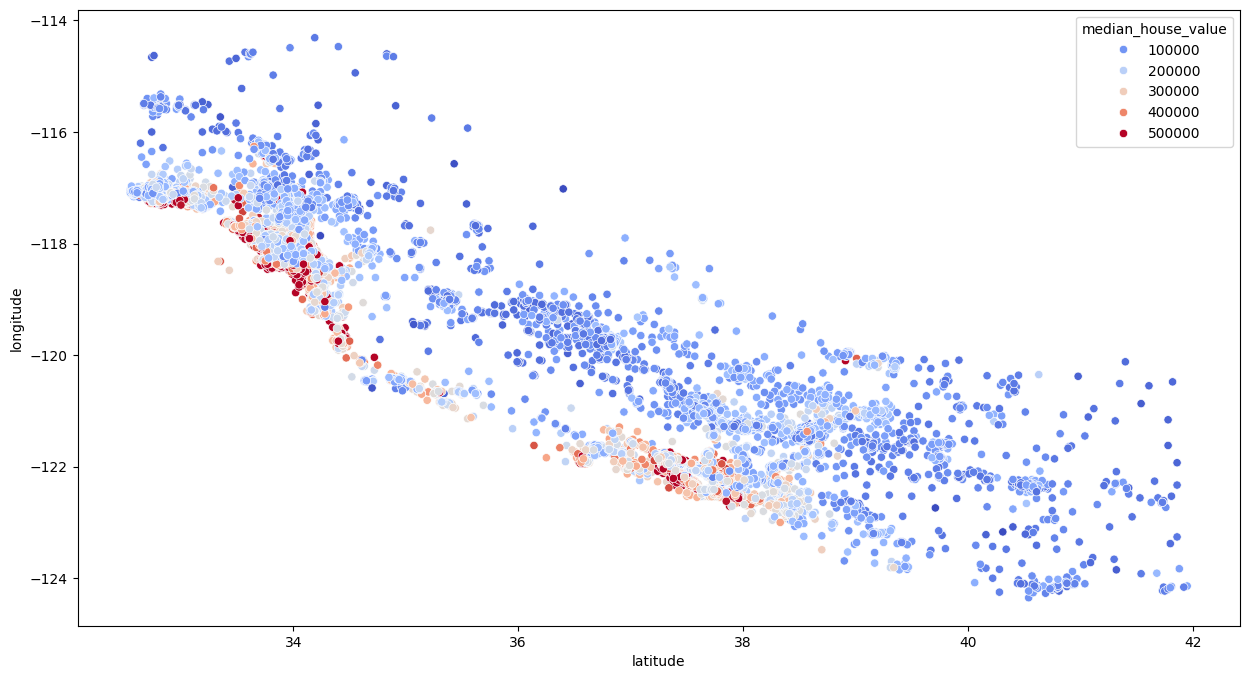

In [45]:
# Plotting corr between house locations.

plt.figure(figsize=(15, 8))

sns.scatterplot(x = "latitude", y = "longitude", data=train_data, hue="median_house_value", palette="coolwarm") 

In [46]:
# Finding real correlation between bedrooms and householdrooms and median house value.

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

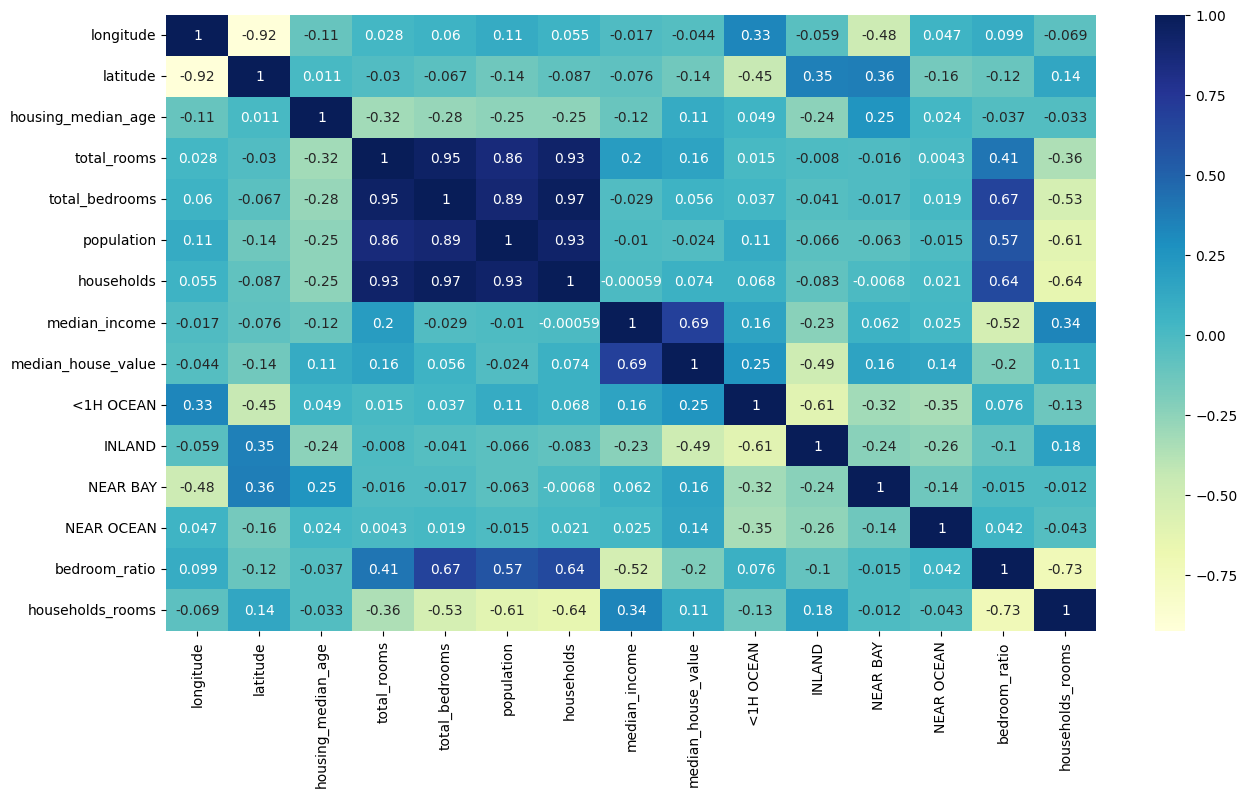

In [47]:
plt.figure(figsize=(15,8)) # Const fix for plots
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu") # Looking at correlations.

In [48]:
# Getting linear reggresion.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data["median_house_value"]
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [49]:
test_data = X_test.join(y_test)


test_data["total_rooms"] = np.log(test_data['total_rooms'] + 1)
test_data["total_bedrooms"] = np.log(test_data['total_bedrooms'] + 1)
test_data["population"] = np.log(test_data['population'] + 1)
test_data["households"] = np.log(test_data['households'] + 1)


test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

test_data = test_data.drop(["ISLAND"], axis=1)

In [50]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data["median_house_value"]

In [51]:
X_test_s = scaler.transform(X_test)

In [52]:
reg.score(X_test_s, y_test)

C:\Users\gulse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-327.4174822421706

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [54]:
forest.score(X_test_s, y_test)

0.8013415851227249

In [55]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [3, 10, 30],
    "max_features" : [2, 4, 6, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
best_forest = grid_search.best_estimator_

In [57]:
best_forest.score(X_test_s, y_test)

0.8034399836538431